In [22]:
import sqlite3 as s
import pandas as p
import datetime as d

data = p.read_csv('test_dataset.csv', dtype=str)
data['date'] = data['date'].apply(lambda s: d.datetime.strptime(s, '%Y%m%d').strftime('%Y-%m-%d'))

In [31]:
'''
Вычисление конверсии из Checkout в purchase по месяцам
'''

with s.connect('test_database.db') as db:
    data.to_sql('test', db, if_exists='replace', index=0)
    query_mon = '''
    select
        mon
        ,cast(orders as real)/cast(checkouts as real) as conversion
    from (
        select
            strftime('%Y-%m', date) as mon
            ,count(case when action='Checkout' then 1 else null end) as checkouts
            ,count(case when action='purchase_order_done' then 1 else null end) as orders
        from test
        group by mon
    ) order by mon asc
    '''
    result_mon = p.read_sql(query_mon, db)
display(result_mon)

,mon,conversion
0,2017-01,0.042307
1,2017-02,0.038650
2,2017-03,0.044127
3,2017-04,0.054908
4,2017-05,0.064511
5,2017-06,0.047016
6,2017-07,0.043652
7,2017-08,0.041502
8,2017-09,0.040521
9,2017-10,0.041316


In [27]:
'''
Вычисление конверсии из Checkout в purchase по неделям
'''

with s.connect('test_database.db') as db:    
    query_week = '''
    select
        week
        ,cast(orders as real)/cast(checkouts as real) as conversion
    from (
        select
            strftime('%Y-%W', date) as week
            ,count(case when action='Checkout' then 1 else null end) as checkouts
            ,count(case when action='purchase_order_done' then 1 else null end) as orders
        from test
        group by week
    ) order by week asc
    '''
    result_week = p.read_sql(query_week, db)
display(result_week)

,week,conversion
0,2017-00,0.046667
1,2017-01,0.036579
2,2017-02,0.042852
3,2017-03,0.045502
4,2017-04,0.041320
5,2017-05,0.041691
6,2017-06,0.034028
7,2017-07,0.041602
8,2017-08,0.038819
9,2017-09,0.040981


In [28]:
'''
Нахождение максимально конверсионного источника
'''

with s.connect('test_database.db') as db:    
    query_source = '''
    select
        source
        ,cast(orders as real)/cast(checkouts as real) as conversion
    from (
        select
            channelGrouping as source
            ,count(case when action='Checkout' then 1 else null end) as checkouts
            ,count(case when action='purchase_order_done' then 1 else null end) as orders
        from test
        group by source
    ) order by conversion desc
    '''
    result_source = p.read_sql(query_source, db)
display(result_source)

,source,conversion
0,Retargeting - Other,0.054054
1,Retargeting - Yandex,0.045752
2,Email,0.043281
3,Context - Google Shopping,0.042944
4,Context - Yandex Market,0.041449
5,Partners - Affiliates,0.040803
6,SEO - Other,0.039634
7,SEO - Yandex,0.038362
8,Context - Google Brand,0.038079
9,Context - Yandex Not Brand,0.038006


In [29]:
'''
Вычисление среднего количества посещений по всем пользователям
'''

with s.connect('test_database.db') as db:    
    query_sessions = '''
    select avg(sessions) as avg_sessions
    from (
        select max(visitNumber) as sessions
        from test
        group by fullVisitorId
    )
    '''
    result_sessions = p.read_sql(query_sessions, db)
display(result_sessions)

,avg_sessions
0,54.706648


In [5]:
'''
Нахождение максимального количества источников для одного пользователя
'''

with s.connect('test_database.db') as db:    
    query_maxs = '''
    select max(sources) as max_sources
    from (
        select count(distinct channelGrouping) as sources
        from test
        group by fullVisitorId
    )
    '''
    result_maxs = p.read_sql(query_maxs, db)
display(result_maxs)

,max_sources
0,9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51f96ba860>,
      dtype=object)

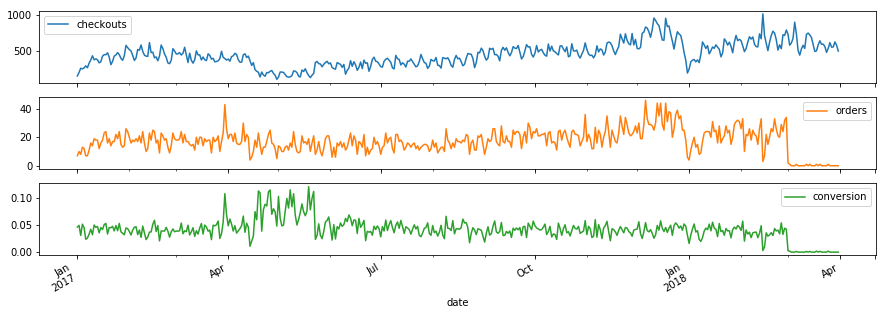

In [30]:
'''
Визуализация checkouts, orders и конверсии по дням, с возможностью видеть ошибки в данных
'''

with s.connect('test_database.db') as db:    
    query_dyn = '''
    select
        date
        ,checkouts
        ,orders
        ,cast(orders as real)/cast(checkouts as real) as conversion
    from (
        select
            date
            ,count(case when action='Checkout' then 1 else null end) as checkouts
            ,count(case when action='purchase_order_done' then 1 else null end) as orders
        from test
        group by date
    ) order by date asc
    '''
    result_dyn = p.read_sql(query_dyn, db, index_col='date', parse_dates=['date'])

%matplotlib inline
result_dyn.plot(subplots=3, figsize=(15,5))